In [4]:
from scipy.stats import binom
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [62]:
mean = 5
stdev = 10
noise_stdev = 100
popn = norm(mean,stdev) # Initiate my random variable. Now, I know 1, but suppose I don't know that the mean is 0. That is, I want to estimate the mean.
                 
samples = popn.rvs((100,1000)) # Generate 100 samples of size 1000 each.
noise = norm(0,noise_stdev).rvs((100,1000)) # Generate noise that is normal(0,1) distributed.

samples = samples + noise

means = np.mean(samples,axis=1) # For each sample, compute the mean. We thus have 100 samples, and mean of each.
sigma_mean = np.std(means) # Standard deviation of X_bar 

(array([ 1.,  1.,  9., 17., 25., 28., 13.,  3.,  1.,  2.]),
 array([-4.47193638, -2.58539164, -0.69884689,  1.18769786,  3.0742426 ,
         4.96078735,  6.84733209,  8.73387684, 10.62042159, 12.50696633,
        14.39351108]),
 <BarContainer object of 10 artists>)

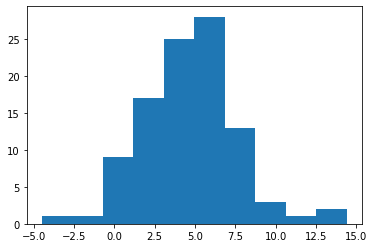

In [63]:
plt.hist(means)

In [82]:
alpha = np.array([0.5,0.4,0.3,0.2,0.1,0.05,0.01,0.001,0.0001])
z_alpha = norm(0,1).ppf(1-alpha) # Generate confidence intervals.

Text(0, 0.5, 'Length of interval')

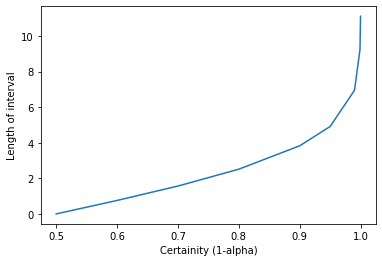

In [85]:
plt.plot(1-alpha,z_alpha*sigma_mean)
plt.xlabel("Certainity (1-alpha)")
plt.ylabel("Length of interval")

More certainty that we desire --> bigger length of confidence interval. Indeed, if we want 100% confidence, then z_alpha = +infinity, that is, the interval has length infinity. Therefore, a more reasonable length such as 95% suffices. And note that this is a statement made with certainty when we know the sampling distribution of our estimator X_bar (as in here).

That is, of all samples with size $n$ such that points are sampled with replacement (so, they are IID draws), $100(1-\alpha)$% of $\textbf{$100(1-\alpha)$% confidence intervals}$ consist of the true parameter. 

So, if I consider all points that belong in $100(1-\alpha)$ percentage of these $n$ intervals, then one of them will  be the true parameter.